# Test kwartiel 2: een parachutesprong analyseren

# Context

Parachutisten gebruiken een hoogtemeter  tijdens een sprong. Deze hoogtemeter wordt aan de pols gedragen tijdens de sprong en berekent de hoogte van de parachutist op basis van een drukmeting. Op deze manier weet de parachutist wanneer hij zijn parachute op een veilige hoogte moet openen.

![title](Images/Hoogtemeter_analoog.jpg)
![title](Images/Hoogtemeter_digitaal.jpg)
![title](Images/Parachute_VLS.jpg)


Er bestaan analoge en digitale hoogtemeters. Het voordeel van de laatste soort is dat deze de data ook kunnen opslaan en het zo dus mogelijk wordt om de sprong achteraf te analyseren. Op die manier kunnen we nagaan of modellen uit de fysica overeenkomen met de meetdata. Vanuit de fysica/mechanica lessen weten jullie dat tijdens een parachutesprong 2 krachten op de parachutist werken: de zwaartekracht en de luchtweerstand. Ook deze formules hebben jullie ongetwijfeld al eerder gezien:

&nbsp; &nbsp; &nbsp; &nbsp; $F_g = m \cdot g$ &nbsp;  &nbsp; en &nbsp; &nbsp; $ F_d = \frac{1}{2} \rho v^2 C_D A $


Met: <br>
&nbsp; $F_g =$ de zwaartekracht <br>
&nbsp; $ m =$ de massa van het vallend voorwerp <br>
&nbsp; $ g =$ de valversnelling <br>
&nbsp; $ F_d =$ de luchtweerstand (d van drag) <br>
&nbsp; $ \rho =$ de massadichtheid van lucht <br>
&nbsp; $ C_D =$ de dimensieloze weerstandcoëfficiënt, voor een parachutist is dit bij benadering 1,1 <br>
&nbsp; $ A =$ de geprojecteerde oppervlakte, loodrecht op de bewegingsrichting. Voor een parachutist die horizontaal een vrije val uitvoert is dit bij benadering 0,45 m² <br>

Na deze hele inleiding, is het waarschijnlijk geen verrassing meer dat jullie in dit deel van de test de **meetdata van een digitale hoogtemeter gaan analyseren**. Tijdens deze test zijn alle hulpmiddelen behalve communicatie toegelaten. Wij zijn er echter van overtuigd dat een aantal hulpmiddelen (o.a. AI) jullie vooral kostbare tijd zullen kosten. Ons advies is dus: vertrouw op je eigen kunnen en ga gericht op zoek naar hulp in bvb de bibliotheek **slimmeFuncties.py** of een eerder gemaakte oefening. Een belangrijke randvoorwaarde van deze test is bovendien dat je een aantal keer een functie uit de bibliotheek slimmeFuncties.py zal **moeten** gebruiken.

We beginnen uiteraard met het importeren van enkele bibliotheken en het inlezen van de meetdata:

In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
from slimmeFuncties import * 
from qgridnext import show_grid

In [3]:
dfParachuteOrigineel = pd.read_csv("Parachute_SprongOrigineel.csv", sep=";",encoding="latin-1")

show_grid(dfParachuteOrigineel)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…


### Opdracht 1
> ##### 2 punten

Vervolledig onderstaande functie zodat de hoogte van de parachutist in functie van de tijd wordt geplot.

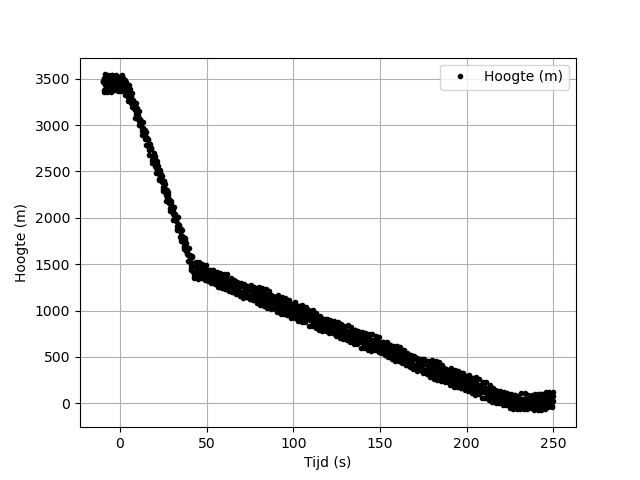

In [4]:
def plotSprong(df, yData = "Hoogte (m)"):
    # TODO 1: vul aan
    xAs = df["Tijd (s)"]  #TODO
    yAs = df[yData] #TODO  
# yAs = df['Hoogte (m)'] is iets minder algemeen maar toch goedkeuren
# dfParachuteOrigineel ipv df --> 1/2
    plt.figure()
    plt.plot(xAs,yAs, color="black",marker='.',linestyle='', label=yData)
    plt.legend()
    plt.xlabel("Tijd (s)")
    plt.ylabel(yData)
    plt.grid()
    plt.show()
    
plotSprong(dfParachuteOrigineel) 

### Opdracht 2 
> ##### 2 punten

Bovenstaande data bevat behoorlijk wat ruis. Gebruik een slimme functie uit de bibliotheek slimmeFuncties.py om deze ruis visueel te verminderen. Gebruik vervolgens de functie plotSprong uit opdracht 1 om het resultaat te controleren.

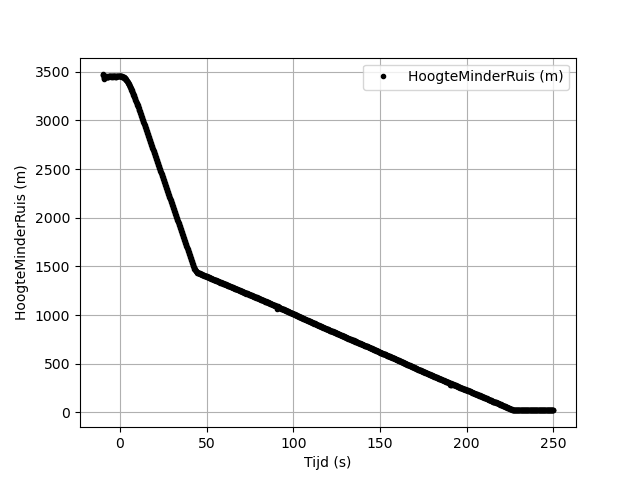

In [5]:
# Schrijf hieronder je code

dfParachuteOrigineel['HoogteMinderRuis (m)'] = zwevendGemiddelde(dfParachuteOrigineel['Hoogte (m)'],10)  #TODO

plotSprong(dfParachuteOrigineel, yData = "HoogteMinderRuis (m)")

# zwevendGemiddelde met parameter 10 is gewoon uitproberen, kan ook een ander (realistisch) getal zijn
# punt voor uitleg parameter weglaten?
# Als bij opdracht 1 yAs = df['Hoogte (m)'], dan kan het hier mislopen. Hier wel -0.5.


### Intermezzo
Ruis visueel wegfilteren is behoorlijk goed te doen maar als we _mooie_ berekeningen willen maken, moet de data nog beter opgeschoond worden. Dit is gedaan in een apart csv-bestand dat we hieronder inlezen en waarmee we vanaf nu verder zullen rekenen.

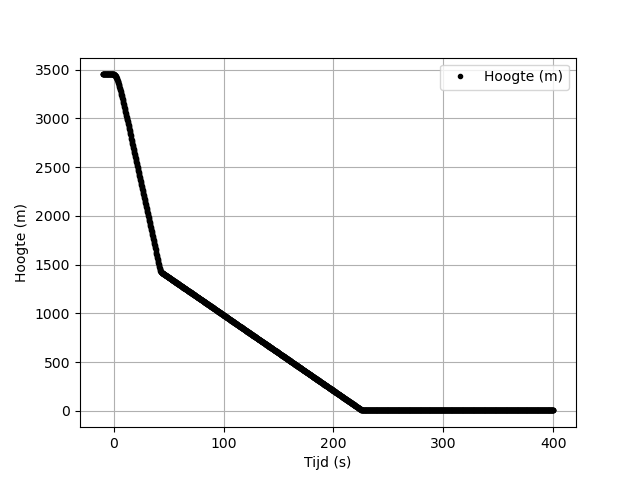

In [6]:
dfParachute = pd.read_csv("Parachute_SprongZonderRuis.csv", sep=";",encoding="latin-1")

plotSprong(dfParachute)


Als je de data zonder ruis in detail wil bekijken, kan je de volgende codecel uitvoeren.

In [7]:
show_grid(dfParachute)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Opdracht 3 
> ##### 2 punten

De functie berekenSnelheid (gedefinieerd in onderstaand codeblok) voegt een kolom met de snelheid toe aan een dataframe. Pas deze functie toe op de meetdata van de parachutesprong en geef beknopt uitleg over de code waar aangegeven in onderstaand blok.

In [9]:
def berekenSnelheid(dataFrame):
    dataFrame.loc[0,"Snelheid (m/s)"]=0
    for i in range(1,len(dataFrame)):
        getal1 = dataFrame.loc[i,"Hoogte (m)"] - dataFrame.loc[i-1,"Hoogte (m)"]
        getal2 = dataFrame.loc[i,"Tijd (s)"] - dataFrame.loc[i-1,"Tijd (s)"]
        dataFrame.loc[i,"Snelheid (m/s)"]= getal1 / getal2
    return dataFrame

berekenSnelheid(dfParachute)


,Tijd (s),Hoogte (m),Snelheid (m/s)
0,-10.0,3450.000000,0.000000
1,-9.8,3450.023271,0.116355
2,-9.6,3450.049338,0.130335
3,-9.4,3450.077602,0.141320
4,-9.2,3450.107356,0.148770
...,...,...,...
2046,399.2,6.193285,-0.029905
2047,399.4,6.187654,-0.028156
2048,399.6,6.182787,-0.024333
2049,399.8,6.178995,-0.018960


#### Oplossing opdracht 3

> ##### 1 punt

getal 1 = delta(hoogte), getal 2 = delta(tijd), snelheid = delta(hoogte) / delta(tijd)
        
> ##### 1 punt

range gaat van 1e getal tot laatste-1 en de index van de dataframe gaat van nul tot len(df)-1. De dimensies kloppen op deze manier, een volledige kolom wordt gevuld.

### Opdracht 4
> ##### 3 punten

Pas de code van opdracht 1 aan om een grafiek te maken met 2 verticale assen. Op de linkeras plot je de hoogte in functie van de tijd zoals bij opdracht 1, op de rechteras plot je de **grootte** van de snelheid in functie van de tijd.

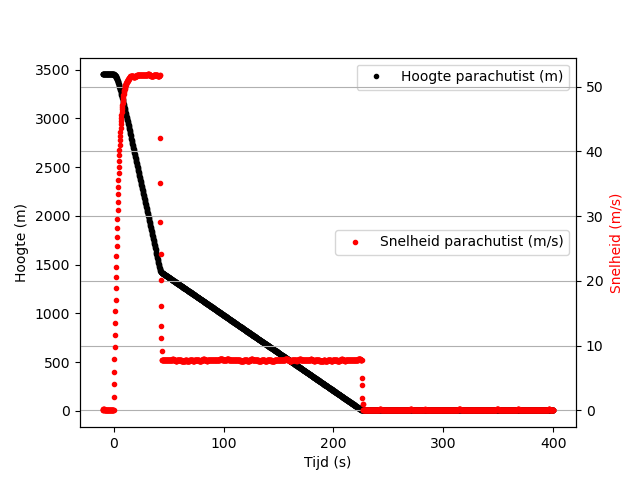

In [11]:
def plotHoogteEnSnelheid(df):
    # kopieer hier zelf de code van opdracht 1 en pas aan!
    xAs = df["Tijd (s)"]
    yAs = df["Hoogte (m)"]
    plt.figure()
    plt.plot(xAs,yAs, color="black",marker='.',linestyle='', label="Hoogte parachutist (m)")
    plt.legend()
    plt.xlabel("Tijd (s)")
    plt.ylabel("Hoogte (m)")
    
    ax=plt.twinx()

    yAs2 = abs(df["Snelheid (m/s)"])  
    plt.plot(xAs,yAs2, marker = '.', linestyle = '', color="red", label = "Snelheid parachutist (m/s)") 
    plt.ylabel("Snelheid (m/s)", color="red")
    plt.legend(loc = 5)
     
    plt.grid()
    plt.show()
    
plotHoogteEnSnelheid(dfParachute) 

# geen positieve snelheid = -0.5
# 2 grafieken naast elkaar ipv samen met 2 assen = -0.5
# geen astitels = -0.5
# geen label = -0.5 (plaats maakt niet uit)


### Opdracht 5
> ##### 3 punten

Beschrijf de plot die je zonet hebt gemaakt.
* Welke fasen van de sprong zie je in de plot?
* Zie je een link met de fysica formules?

#### Oplossing opdracht 5

[schrijf hier je oplossing = dubbelklik en typ je oplossing]
* vóór sprong snelheid 0 --> constante hoogte in vliegtuig voor de sprong
* bij sprong sterke stijging snelheid, even gelijk aan valversnelling
* daarna naar constante snelheid door luchtweerstand
* bij parachute open snelheid snel lager door grotere luchtweerstand (evenredig met oppervlakte parachute)

4 fasen: vliegtuig - vrije val - parachute - grond. Per herkende fase 1 punt (dus ofwel vliegtuig, ofwel grond moet erbij)
Link fysica formules zit eigenlijk ook in opdracht 6 dus misschien hier niet te streng op zijn?

### Opdracht 6
> ##### 2 punten

De snelheid evolueert 2 keert ongeveer naar een stationaire (=constante) snelheid. Waaraan is de versnelling op dat moment gelijk? Wat wil dit zeggen over de krachten die in het spel zijn? Is dit logisch op basis van het fysica model? Verwijs naar de 2e wet van Newton!


#### Oplossing opdracht 6

[schrijf hier je oplossing = dubbelklik en typ je oplossing]

Bij constante snelheid --> a = 0 --> fz = fd .    (1 punt)

Kan gebeuren omdat fd = evenredig met v², fd stijgt dus tijdens vrije val totdat fz = fd . (0.5 punt)

A is groter als parachute open. Bij nieuw evenwicht (fz = fd) is v dus lager. (0.5 punt)

In de gaten houden of een deel al gezegd is bij opdracht 5!



### Opdracht 7
> ##### 3 punten

Gebruik een functie uit de bibliotheek slimmeFuncties.py om het **snelheidsplateau** tijdens de vrije val van de parachutist uit de meetdata te **selecteren**. Schrijf de code zo algemeen mogelijk zodat deze ook toepasbaar is op toekomstige parachutesprongen.

Bepaal vervolgens de waarde van die stationaire snelheid en **print** deze in een **netjes afgewerkte zin** op het scherm.

In [9]:
# Eventuele tussenstappen moet je zelfstandig uitvoeren. Sla de meetdata van het snelheidsplateau
# op in een dataframe met de naam dfSnelheidsplateau

dfHulp = knipTotPercentage(dfParachute, 'Snelheid (m/s)', 0.02, stijgendeFlank = False)  
dfSnelheidsplateau = selecteerTotPercentage(dfHulp, 'Snelheid (m/s)', 0.05, stijgendeFlank = True) #TODO

# OPMERKING: hier gaat het waarschijnlijk mislopen omdat hierboven de GROOTTE van de snelheid geplot is
# Dit gaat resulteren in verkeerde percentages en stijgendeFlank

snelheidPlateau = abs(dfSnelheidsplateau['Snelheid (m/s)'].mean())
print('De stationaire snelheid op het einde van de vrij val beweging is gelijk aan ', np.round(snelheidPlateau,2), ' m/s.')

De stationaire snelheid op het einde van de vrij val beweging is gelijk aan  51.67  m/s.


1 punt voor knippen, 
1 punt voor selecteren, 
1 punt voor uitrekenen + afronden

### Opdracht 8
> ##### 1 punt

Bepaal het tijdstip waarop de parachute geopend wordt. Schrijf deze code opnieuw zo algemeen mogelijk.

In [ ]:
tParachuteOpen = dfSnelheidsplateau['Tijd (s)'].max()  #TODO

### Opdracht 9 
> 2 punten

Bereken de oppervlakte van de parachute. Deze sprong werd uitgevoerd door een man van 75.4 kg. **Print** deze oppervlakte opnieuw een **netjes afgewerkte zin** op het scherm.


In [13]:
# nodige parameters:
m = 75.4  # kg
g = 9.81  # m/s²
rho = 1.185  # kg/m³ - zie formularium
Cd = 1.1

# v nog zoeken met python, beetje analoog aan opdracht 6.
# knippen op percentages hier moeilijker dus beetje soepel zijn op knipvoorwaarde.
# wel liever snelheid berekenen als gemiddelde van een tijdsinterval en niet als 1 afgelezen waarde

dfHulp2 = knipTotWaarde(dfParachute, 'Tijd (s)', 100, stijgendeFlank = True)
dfParachuteOpen = selecteerTotWaarde(dfHulp2, 'Tijd (s)', 150, stijgendeFlank = True)
eindSnelheid = dfParachuteOpen['Snelheid (m/s)'].mean()

Aparachute = (2 * m * g)/(rho * eindSnelheid**2 * Cd)

print('De oppervlakte van de parachute is ', np.round(Aparachute,2), 'm²')

# 0.5 punt: variabelen definiëren
# 0.5 punt: snelheid berekenen als gemiddelde
# 0.5 punt: Aparachute berekening
# 0.5 punt: deftige print

De oppervlakte van de parachute is  18.91 m²


### BONUSopdracht
> ##### 2 BONUSpunten

Schrijf code om iets wetenschappelijk relevant voor deze parachutesprong te berekenen of tekenen. Als randvoorwaarde ben je verplicht om **minstens 1 slimmeFunctie** te gebruiken.

In [12]:
# TODO Je bent hier dus volledig vrij!

# 0.5 punt voor uitleg wat je kan doen
# 1.5 punt voor correcte code

Mogelijkheden BONUSopdracht:
* Vorm de functie om de snelheid te berekenen om naar een functie om de versnelling te berekenen.
* Maak lineaire fit op de kolom 'Hoogte (m)' om 1 van de stationaire snelheden te berekenen.
* Knip het begin van de vrij val beweging en bepaal de versnelling -> deze daalt onmiddellijk onder de valversnelling door de luchtweerstand
* ...